In [1]:
from __future__ import division
#
import os, sys
sys.path.append(os.getcwd()+'/..')
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
from supports._setting import trips_dir
from supports._setting import DInAP_PInAP, DInAP_POutAP
from supports.charts import bar_table, two_pie_chart
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
whole_trips = pd.read_csv('%s/%s'%(trips_dir, 'whole-tm-num-dur-fare.csv'))

In [3]:
Y09 = whole_trips[(whole_trips['yy'] == 9)]
Y10 = whole_trips[(whole_trips['yy'] == 10)]

In [4]:
Y09_gb, Y10_gb = Y09.groupby(['trip-mode']), Y10.groupby(['trip-mode'])
Y09_tm_num, Y10_tm_num = Y09_gb.sum()['num-tm'], Y10_gb.sum()['num-tm']

[[834039, 1207006], [2520670, 2730197]]


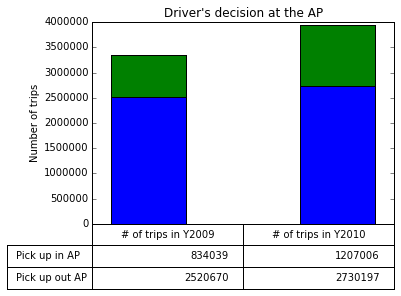

In [5]:
_data = [[ Y09_tm_num[DInAP_PInAP],  Y10_tm_num[DInAP_PInAP]],
        [ Y09_tm_num[DInAP_POutAP],  Y10_tm_num[DInAP_POutAP]]]
print _data
row_labels, col_labels = ['Pick up in AP', 'Pick up out AP'], ['# of trips in Y2009', '# of trips in Y2010']

bar_table("Driver's decision at the AP", 'Number of trips', row_labels, col_labels, _data)

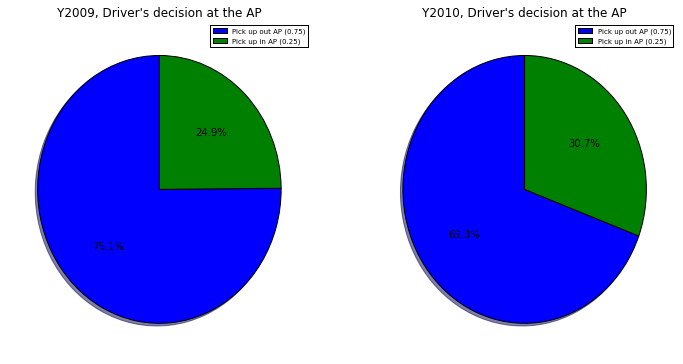

In [7]:
per_data1 = [_data[1][0] / (_data[0][0] + _data[1][0]), _data[0][0] / (_data[0][0] + _data[1][0])]
per_data2 = [_data[1][1] / (_data[0][1] + _data[1][1]), _data[0][1] / (_data[0][1] + _data[1][1])]
two_pie_chart(['Pick up out AP', 'Pick up in AP'], 
              "Y2009, Driver's decision at the AP",per_data1,
              "Y2010, Driver's decision at the AP",per_data2)
